In [1]:
import numpy as np
import darkopt as dark # can import either entire package
from darkopt import materials, optimize # or import submodules seperately 
import darkopt.plotting as plot
import matplotlib.pyplot as plt

### Optimize 1% coverage device

optimize both for the effective overlap efficiency factor of 0.13 and 0.45. Ideally, the design parameters should not vary significantly between the two

In [3]:
desired_coverage = 0.01

l_tes0 = 100e-6
l_tes_bnds = [5e-6, 300e-6]
l_overlap0 = 10e-6
l_overlap_bnds = [5e-06, 40e-6]
l_fin0 = 100e-6
l_fin_bnds = [25e-6, 500e-6]
n_fin0 = 4
n_fin_bnds = [2,6]

res_n = 250e-3
rp = 2e-3
ahole = 4.9e-11


bounds=[l_tes_bnds,l_overlap_bnds ,l_fin_bnds , n_fin_bnds]
fixrn=True

veff_WAloverlap=.13 # theoretical
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fixrn=fixrn,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="cube", 
                                                    abs_height=1e-2, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                        
                                                     bounds = bounds)

veff_WAloverlap=.45 # measured
print(f'Effective W/Al volume = {veff_WAloverlap}')
det_opt_1, eres, params = optimize.optimize_detector( tes_length0=l_tes0,
                                                    tes_l_overlap0=l_overlap0,
                                                    l_fin0=l_fin0,
                                                    n_fin0=n_fin0,
                                                    per_Al = desired_coverage,   
                                                    fixrn=fixrn,
                                                    #tes_width=w,
                                                    abs_type="Si", 
                                                    abs_shape="cube", 
                                                    abs_height=1e-2, 
                                                    abs_width=1e-2, 
                                                    w_safety=3e-3,
                                                    sigma=220000000.0,
                                                    rn=res_n,
                                                    rp=rp,
                                                    L_tot=5e-08,
                                                    ahole=ahole, 
                                                    con_type='ellipse',
                                                    veff_WAloverlap=veff_WAloverlap,
                                                    bounds = bounds)


Effective W/Al volume = 0.13
resolution: 236.5 [meV]
TES Length = 66.4 [μm]
Overlap Legth = 13.0 [μm]
Fin Length = 73.9 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.000 [%]
Absolute phonon collection energy efficiency = 27.54 [%]
Number of TESs = 255
Rn = 250.0 [mOhms]
Close Packed: False
Phase margin = 468.8 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------


Effective W/Al volume = 0.45
resolution: 342.3 [meV]
TES Length = 60.9 [μm]
Overlap Legth = 10.2 [μm]
Fin Length = 78.5 [μm]
Fin Height = 0.6 [μm]
N Fins = 4
Total Al surface coverage = 1.000 [%]
Absolute phonon collection energy efficiency = 23.35 [%]
Number of TESs = 234
Rn = 250.0 [mOhms]
Close Packed: False
Phase margin = 395.6 [%] (phase_sep_length  - tes_length )/tes_length )
---------------------------------




### Plots

(<Figure size 486x320.76 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa10a43c2e0>)

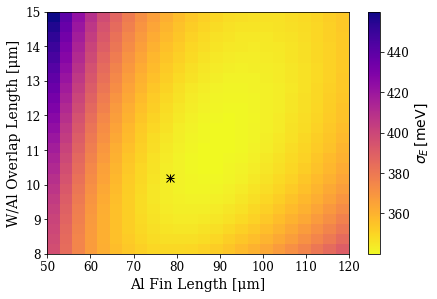

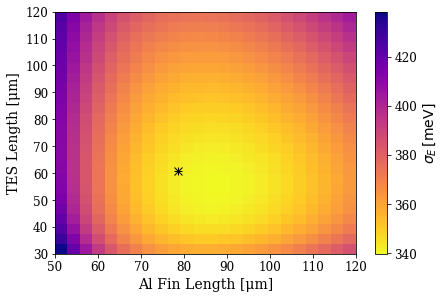

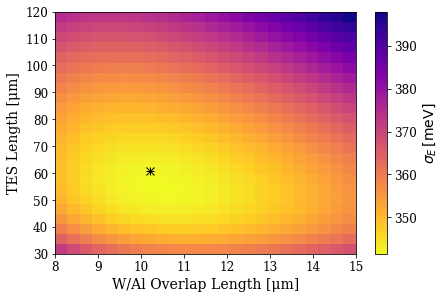

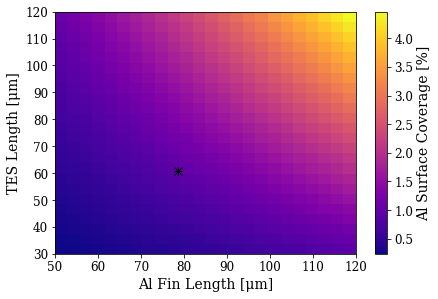

In [5]:
n = 25

l = np.linspace(30e-6, 120e-6, n)
l_f = np.linspace(50e-6, 120e-6, n)
l_overlap = np.linspace(8e-6, 15e-6, n)

plot.plot_loverlap_vs_lfin(l_overlap, l_f, det_opt_1, val='energy')
plot.plot_ltes_vs_lfin(l, l_f, det_opt_1, val='energy')
plot.plot_ltes_vs_loverlap(l, l_overlap, det_opt_1, val='energy')


plot.plot_ltes_vs_lfin(l, l_f, det_opt_1, val='al')
